In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import numpy as np
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import scipy
import seaborn as sns
import glob


def ecdf(data):
	""" Compute ECDF """
	x = np.sort(data)
	n = x.size
	y = np.arange(1, n+1) / float(n)
	return(x,y)


In [74]:
def add_random(f):
    df = pd.read_csv(f,sep="\t",header=None)
    df = df[df[4]<=0.0001]
    df = df[df[10]<=0.0001]
    df = df.sort_values(12)
    df[13] = df[6]+df[7].astype(str)+df[8].astype(str)
    df = df.drop_duplicates(13)  
#     df = background.sample(n=743)
    x,y = ecdf(df[12].apply(lambda x:np.log10(x+1)))
    if "1" == f.split(".")[-1]:
        plt.plot(x,y,label="Background",linewidth=2, c="grey",alpha=0.2)
    else:
        plt.plot(x,y,linewidth=2, c="grey",alpha=0.2)
#     print (df.head())
    return df[12].median()

In [50]:
def get_p(x,dist):
    mu = np.mean(dist)
    std = np.std(dist)
    z_scores = abs(x-mu)/std
    print (mu)
    return scipy.stats.norm.sf(abs(z_scores))*2

In [37]:
df = pd.read_csv("NFIX_PU1.global.bed",sep="\t",header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,chr1,3005691,3005707,NFIX,9.93578,+,chr1,3005098,3005110,PU1,11.8624,-,582
1,chr1,3007362,3007378,NFIX,10.09170,+,chr1,3007234,3007246,PU1,10.9266,-,117
2,chr1,3033150,3033166,NFIX,13.02750,+,chr1,3033753,3033765,PU1,10.6147,+,588
3,chr1,3033238,3033254,NFIX,10.84400,+,chr1,3033753,3033765,PU1,10.6147,+,500
4,chr1,3034181,3034197,NFIX,10.56880,+,chr1,3033753,3033765,PU1,10.6147,+,417


In [43]:
background = pd.read_csv("NFIX_PU1.global.bed",sep="\t",header=None)
background = background.sort_values(12)
background[13] = background[6]+background[7].astype(str)+background[8].astype(str)
background[14] = background[0]+background[1].astype(str)+background[2].astype(str)
background = background.drop_duplicates(13)
background = background.drop_duplicates(14)
background.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
467280,chr7,127895101,127895117,NFIX,11.44950,+,chr7,127895108,127895120,PU1,10.9817,-,0,chr7127895108127895120,chr7127895101127895117
414813,chr6,36913640,36913656,NFIX,11.55050,+,chr6,36913632,36913644,PU1,10.8807,-,0,chr63691363236913644,chr63691364036913656
138199,chr13,73628358,73628374,NFIX,12.73390,+,chr13,73628350,73628362,PU1,11.3119,+,0,chr137362835073628362,chr137362835873628374
524967,chr9,98435503,98435519,NFIX,9.89908,+,chr9,98435494,98435506,PU1,11.8991,+,0,chr99843549498435506,chr99843550398435519
468247,chr7,131655682,131655698,NFIX,10.35780,+,chr7,131655674,131655686,PU1,12.0275,+,0,chr7131655674131655686,chr7131655682131655698


In [44]:
background.shape

(389509, 15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
439527,chr6,149156432,149156448,NFIX,9.97248,+,chr6,149156971,149156983,PU1,12.1376,+,524,chr6149156971149156983,chr6149156432149156448
555673,chrX,65623195,65623211,NFIX,13.02750,+,chrX,65623798,65623810,PU1,11.0550,+,588,chrX6562379865623810,chrX6562319565623211
86335,chr11,87431382,87431398,NFIX,13.11010,+,chr11,87432765,87432777,PU1,10.8257,-,1368,chr118743276587432777,chr118743138287431398
535672,chrNT_165796,79779,79795,NFIX,11.35780,+,chrNT_165796,79458,79470,PU1,12.4404,-,310,chrNT_1657967945879470,chrNT_1657967977979795
247781,chr18,62187592,62187608,NFIX,16.22020,+,chr18,62187076,62187088,PU1,12.2294,-,505,chr186218707662187088,chr186218759262187608


(719, 14)

        0          1          2                 3         4  5      6   \
592   chr2  118572544  118572560  CAGGGCCCTGAGCCAT  0.000047  +   chr2   
590   chr2  118556339  118556355  CTTGGCGGGAGGCCAA  0.000009  +   chr2   
489  chr19    5661129    5661145  TCAGGCCCCCAGCCCA  0.000053  +  chr19   
208  chr11  117819653  117819669  CCTGGCCACTTCCCCA  0.000042  +  chr11   
680   chr4  115410352  115410368  CCGGGGCCGCTGCCAA  0.000018  +   chr4   

            7          8             9             10 11  12  \
592  118572559  118572571  TAAGGGGAACTG  4.340000e-06  +   0   
590  118556331  118556343  CAAGGGGAAGCC  9.490000e-05  -   0   
489    5661119    5661131  AAACAGGAACTC  5.770000e-05  +   0   
208  117819659  117819671  GATGGGGAAGTG  8.680000e-06  -   0   
680  115410366  115410378  AAAGGGGAAGTG  1.250000e-07  +   0   

                          13                       14  
592   chr2118572559118572571   chr2118572544118572560  
590   chr2118556331118556343   chr2118556339118556355  
48

5.700740874020828e-127

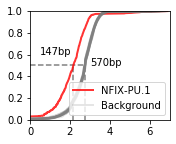

In [76]:
df = pd.read_csv("NFIX_PU1_motif.distance",sep="\t",header=None)
# df = df[df[4]<=0.0001]
# df = df[df[10]<=0.0001]
df = df.sort_values(12)
df[13] = df[6]+df[7].astype(str)+df[8].astype(str)
df[14] = df[0]+df[1].astype(str)+df[2].astype(str)
print (df.head())
df = df.drop_duplicates(13)
df = df.drop_duplicates(14)
print (df.shape)
plt.figure(figsize=(2.5,2))
x=df[12].median()
x=570
median_dist=df[12].median()
x=np.log10(x+1)
plt.plot(np.array([x,x]),np.array([0,0.5]),c="grey",linestyle='dashed')
plt.plot(np.array([0,x]),np.array([0.5,0.5]),c="grey",linestyle='dashed')

x=df[12].median()
median_dist=df[12].median()
x=np.log10(x+1)
plt.plot(np.array([x,x]),np.array([0,0.5]),c="grey",linestyle='dashed')
# plt.plot(np.array([0,x]),np.array([0.5,0.5]),c="grey",linestyle='dashed')

x,y = ecdf(df[12].apply(lambda x:np.log10(x+1)))
plt.plot(x,y,label="NFIX-PU.1",linewidth=2, c="red",alpha=0.8)
background_distance=[]
for f in glob.glob("random*/*"):
    
    background_distance.append(add_random(f))
plt.xlim(0,7)
plt.ylim(0,1)
plt.text(0.5,0.6,"%sbp"%(int(median_dist)))
plt.text(3,0.5,"%sbp"%(int(570)))
plt.legend()
plt.savefig("%s_ecdf_with_bg.pdf"%("NFIX_PU1_motif"), bbox_inches='tight')
import scipy
p_value = get_p(median_dist,background_distance)
p_value

In [29]:
median_dist

nan

In [60]:
df[[0,1,2]].to_csv("matched_NFIX_motifs.bed",sep="\t",header=False,index=False)

In [16]:
background_distance

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

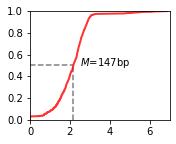

In [57]:
plt.figure(figsize=(2.5,2))
x=df[12].median()
x=np.log10(x+1)
plt.plot(np.array([x,x]),np.array([0,0.5]),c="grey",linestyle='dashed')
plt.plot(np.array([0,x]),np.array([0.5,0.5]),c="grey",linestyle='dashed')
x,y = ecdf(df[12].apply(lambda x:np.log10(x+1)))
plt.plot(x,y,label="NFIX-PU.1",linewidth=2, c="red",alpha=0.8)
plt.xlim(0,7)
plt.ylim(0,1)
plt.text(2.5,0.5,"$M$=147bp")
plt.savefig("%s_ecdf.pdf"%("NFIX_PU1_motif"), bbox_inches='tight')


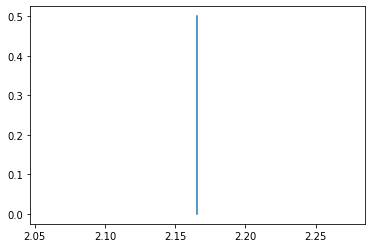

In [40]:
plt.plot(np.array([x,x]),np.array([0,0.5]))

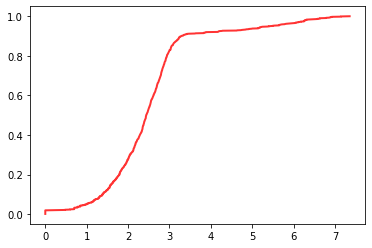